# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import the libraries needed for the the project.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import requests
import json
import time
import os
import io

%matplotlib inline

In [2]:
# load the twitter archive file to a dataframe

twt_df = pd.read_csv('twitter-archive-enhanced.csv')


twt_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download the tweet image prediction (image_predictions.tsv)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# open the tsv file and save the content

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame

img_pd_df = pd.read_csv('image-predictions.tsv', sep='\t')
img_pd_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
img_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Twitter API - consumer key and access tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

#developer keys removed

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


In [7]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

# The Tweet IDs we need to gather more data using the Twitter API

tweet_ids = twt_df.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive 
count = 0 
# dictionary to catch the errors 
error_dict = {} 
start = time.time()

# Save the tweet's returned JSON as a new line in a .txt file 
with open ('tweet_json.txt', 'w') as file:

# This loop will likely take 20-30 minutes to run because of Twitter's rate limit 
    for tweet_id in tweet_ids:
        count += 1
        try:
            # Get the status data for each of the tweet IDs 
            tweet = api.get_status (tweet_id, tweet_mode = 'extended') 
            print(str(count) + ":" + "ID - " + str (tweet_id)) 
            
            # Convert the tweet status to JSON string and save it in the generated file 
            json.dump(tweet._json, file) 
            
            # recognize in as a break of text 
            file.write("\n")
            
            # Catching errors that might occur while accessing the tweet data or content
            
        except tweepy.TweepyException as error:
                print(str(count) + ": " + "ID - " + str(tweet_id) + " has an error:", error.response. text) 
                
                # Appending the errors to the dictionary: error_dict 
                error_dict[tweet_id] = error
end = time.time() 
print(end - start)

1:ID - 892420643555336193
2:ID - 892177421306343426
3:ID - 891815181378084864
4:ID - 891689557279858688
5:ID - 891327558926688256
6:ID - 891087950875897856
7:ID - 890971913173991426
8:ID - 890729181411237888
9:ID - 890609185150312448
10:ID - 890240255349198849
11:ID - 890006608113172480
12:ID - 889880896479866881
13:ID - 889665388333682689
14:ID - 889638837579907072
15:ID - 889531135344209921
16:ID - 889278841981685760
17:ID - 888917238123831296
18:ID - 888804989199671297
19:ID - 888554962724278272
20: ID - 888202515573088257 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
21:ID - 888078434458587136
22:ID - 887705289381826560
23:ID - 887517139158093824
24:ID - 887473957103951883
25:ID - 887343217045368832
26:ID - 887101392804085760
27:ID - 886983233522544640
28:ID - 886736880519319552
29:ID - 886680336477933568
30:ID - 886366144734445568
31:ID - 886267009285017600
32:ID - 886258384151887873
33:ID - 886054160059072513
34:ID - 885984800019947520
35:ID - 

259:ID - 843604394117681152
260:ID - 843235543001513987
261: ID - 842892208864923648 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
262:ID - 842846295480000512
263:ID - 842765311967449089
264:ID - 842535590457499648
265:ID - 842163532590374912
266:ID - 842115215311396866
267:ID - 841833993020538882
268:ID - 841680585030541313
269:ID - 841439858740625411
270:ID - 841320156043304961
271:ID - 841314665196081154
272:ID - 841077006473256960
273:ID - 840761248237133825
274:ID - 840728873075638272
275:ID - 840698636975636481
276:ID - 840696689258311684
277:ID - 840632337062862849
278:ID - 840370681858686976
279:ID - 840268004936019968
280:ID - 839990271299457024
281:ID - 839549326359670784
282:ID - 839290600511926273
283:ID - 839239871831150596
284:ID - 838952994649550848
285:ID - 838921590096166913
286:ID - 838916489579200512
287:ID - 838831947270979586
288:ID - 838561493054533637
289:ID - 838476387338051585
290:ID - 838201503651401729
291:ID - 838150277551

534:ID - 807621403335917568
535:ID - 807106840509214720
536:ID - 807059379405148160
537:ID - 807010152071229440
538:ID - 806629075125202948
539:ID - 806620845233815552
540:ID - 806576416489959424
541:ID - 806542213899489280
542:ID - 806242860592926720
543:ID - 806219024703037440
544:ID - 805958939288408065
545:ID - 805932879469572096
546:ID - 805826884734976000
547:ID - 805823200554876929
548:ID - 805520635690676224
549:ID - 805487436403003392
550:ID - 805207613751304193
551:ID - 804738756058218496
552:ID - 804475857670639616
553:ID - 804413760345620481
554:ID - 804026241225523202
555:ID - 803773340896923648
556:ID - 803692223237865472
557:ID - 803638050916102144
558:ID - 803380650405482500
559:ID - 803321560782307329
560:ID - 803276597545603072
561:ID - 802952499103731712
562:ID - 802624713319034886
563:ID - 802600418706604034
564:ID - 802572683846291456
565:ID - 802323869084381190
566:ID - 802265048156610565
567: ID - 802247111496568832 has an error: {"errors":[{"code":144,"message":

817:ID - 770787852854652928
818:ID - 770772759874076672
819: ID - 770743923962707968 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
820:ID - 770655142660169732
821:ID - 770414278348247044
822:ID - 770293558247038976
823:ID - 770093767776997377
824:ID - 770069151037685760
825:ID - 769940425801170949
826:ID - 769695466921623552
827:ID - 769335591808995329
828:ID - 769212283578875904
829:ID - 768970937022709760
830:ID - 768909767477751808
831:ID - 768855141948723200
832:ID - 768609597686943744
833:ID - 768596291618299904
834:ID - 768554158521745409
835:ID - 768473857036525572
836:ID - 768193404517830656
837:ID - 767884188863397888
838:ID - 767754930266464257
839:ID - 767500508068192258
840:ID - 767191397493538821
841:ID - 767122157629476866
842: ID - 766864461642756096 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
843:ID - 766793450729734144
844:ID - 766714921925144576
845:ID - 766693177336135680
846:ID - 7664232585436

Rate limit reached. Sleeping for: 272


901:ID - 758740312047005698
902:ID - 758474966123810816
903:ID - 758467244762497024
904:ID - 758405701903519748
905:ID - 758355060040593408
906:ID - 758099635764359168
907:ID - 758041019896193024
908:ID - 757741869644341248
909:ID - 757729163776290825
910:ID - 757725642876129280
911:ID - 757611664640446465
912:ID - 757597904299253760
913:ID - 757596066325864448
914:ID - 757400162377592832
915:ID - 757393109802180609
916:ID - 757354760399941633
917:ID - 756998049151549440
918:ID - 756939218950160384
919:ID - 756651752796094464
920:ID - 756526248105566208
921:ID - 756303284449767430
922:ID - 756288534030475264
923:ID - 756275833623502848
924:ID - 755955933503782912
925:ID - 755206590534418437
926:ID - 755110668769038337
927:ID - 754874841593970688
928:ID - 754856583969079297
929:ID - 754747087846248448
930:ID - 754482103782404096
931:ID - 754449512966619136
932:ID - 754120377874386944
933: ID - 754011816964026368 has an error: {"errors":[{"code":144,"message":"No status found with that I

1185:ID - 718631497683582976
1186:ID - 718613305783398402
1187:ID - 718540630683709445
1188:ID - 718460005985447936
1189:ID - 718454725339934721
1190:ID - 718246886998687744
1191:ID - 718234618122661888
1192:ID - 717841801130979328
1193:ID - 717790033953034240
1194:ID - 717537687239008257
1195:ID - 717428917016076293
1196:ID - 717421804990701568
1197:ID - 717047459982213120
1198:ID - 717009362452090881
1199:ID - 716802964044845056
1200:ID - 716791146589110272
1201:ID - 716730379797970944
1202:ID - 716447146686459905
1203:ID - 716439118184652801
1204:ID - 716285507865542656
1205:ID - 716080869887381504
1206:ID - 715928423106027520
1207:ID - 715758151270801409
1208:ID - 715733265223708672
1209:ID - 715704790270025728
1210:ID - 715696743237730304
1211:ID - 715680795826982913
1212:ID - 715360349751484417
1213:ID - 715342466308784130
1214:ID - 715220193576927233
1215:ID - 715200624753819648
1216:ID - 715009755312439296
1217:ID - 714982300363173890
1218:ID - 714962719905021952
1219:ID - 7149

1468:ID - 694329668942569472
1469:ID - 694206574471057408
1470:ID - 694183373896572928
1471:ID - 694001791655137281
1472:ID - 693993230313091072
1473:ID - 693942351086120961
1474:ID - 693647888581312512
1475:ID - 693644216740769793
1476:ID - 693642232151285760
1477:ID - 693629975228977152
1478:ID - 693622659251335168
1479:ID - 693590843962331137
1480:ID - 693582294167244802
1481:ID - 693486665285931008
1482:ID - 693280720173801472
1483:ID - 693267061318012928
1484:ID - 693262851218264065
1485:ID - 693231807727280129
1486:ID - 693155686491000832
1487:ID - 693109034023534592
1488:ID - 693095443459342336
1489:ID - 692919143163629568
1490:ID - 692905862751522816
1491:ID - 692901601640583168
1492:ID - 692894228850999298
1493:ID - 692828166163931137
1494:ID - 692752401762250755
1495:ID - 692568918515392513
1496:ID - 692535307825213440
1497:ID - 692530551048294401
1498:ID - 692423280028966913
1499:ID - 692417313023332352
1500:ID - 692187005137076224
1501:ID - 692158366030913536
1502:ID - 6921

1748:ID - 679111216690831360
1749:ID - 679062614270468097
1750:ID - 679047485189439488
1751:ID - 679001094530465792
1752:ID - 678991772295516161
1753:ID - 678969228704284672
1754:ID - 678800283649069056
1755:ID - 678798276842360832
1756:ID - 678774928607469569
1757:ID - 678767140346941444
1758:ID - 678764513869611008
1759:ID - 678755239630127104
1760:ID - 678740035362037760
1761:ID - 678708137298427904
1762:ID - 678675843183484930
1763:ID - 678643457146150913
1764:ID - 678446151570427904
1765:ID - 678424312106393600
1766:ID - 678410210315247616
1767:ID - 678399652199309312
1768:ID - 678396796259975168
1769:ID - 678389028614488064
1770:ID - 678380236862578688
1771:ID - 678341075375947776
1772:ID - 678334497360859136
1773:ID - 678278586130948096
1774:ID - 678255464182861824
1775:ID - 678023323247357953
1776:ID - 678021115718029313
1777:ID - 677961670166224897
1778:ID - 677918531514703872
1779:ID - 677895101218201600
1780:ID - 677716515794329600
1781:ID - 677700003327029250
1782:ID - 6776

Rate limit reached. Sleeping for: 295


1801:ID - 676975532580409345
1802:ID - 676957860086095872
1803:ID - 676949632774234114
1804:ID - 676948236477857792
1805:ID - 676946864479084545
1806:ID - 676942428000112642
1807:ID - 676936541936185344
1808:ID - 676916996760600576
1809:ID - 676897532954456065
1810:ID - 676864501615042560
1811:ID - 676821958043033607
1812:ID - 676819651066732545
1813:ID - 676811746707918848
1814:ID - 676776431406465024
1815:ID - 676617503762681856
1816:ID - 676613908052996102
1817:ID - 676606785097199616
1818:ID - 676603393314578432
1819:ID - 676593408224403456
1820:ID - 676590572941893632
1821:ID - 676588346097852417
1822:ID - 676582956622721024
1823:ID - 676575501977128964
1824:ID - 676533798876651520
1825:ID - 676496375194980353
1826:ID - 676470639084101634
1827:ID - 676440007570247681
1828:ID - 676430933382295552
1829:ID - 676263575653122048
1830:ID - 676237365392908289
1831:ID - 676219687039057920
1832:ID - 676215927814406144
1833:ID - 676191832485810177
1834:ID - 676146341966438401
1835:ID - 6761

2084:ID - 670811965569282048
2085:ID - 670807719151067136
2086:ID - 670804601705242624
2087:ID - 670803562457407488
2088:ID - 670797304698376195
2089:ID - 670792680469889025
2090:ID - 670789397210615808
2091:ID - 670786190031921152
2092:ID - 670783437142401025
2093:ID - 670782429121134593
2094:ID - 670780561024270336
2095:ID - 670778058496974848
2096:ID - 670764103623966721
2097:ID - 670755717859713024
2098:ID - 670733412878163972
2099:ID - 670727704916926465
2100:ID - 670717338665226240
2101:ID - 670704688707301377
2102:ID - 670691627984359425
2103:ID - 670679630144274432
2104:ID - 670676092097810432
2105:ID - 670668383499735048
2106:ID - 670474236058800128
2107:ID - 670468609693655041
2108:ID - 670465786746662913
2109:ID - 670452855871037440
2110:ID - 670449342516494336
2111:ID - 670444955656130560
2112:ID - 670442337873600512
2113:ID - 670435821946826752
2114:ID - 670434127938719744
2115:ID - 670433248821026816
2116:ID - 670428280563085312
2117:ID - 670427002554466305
2118:ID - 6704

In [9]:
# create an empty list
df_list = []

# open the tweet_json.txt file

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append the following to the columns
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                       })

# Create a DataFrame with tweet ID, retweet count and favorite count
api_twt_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
#create a tweet_json.csv file

api_twt_df.reset_index(drop=True, inplace=True)
api_twt_df.to_csv('tweet_json.csv', index=False)

In [11]:
api_twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
#Accessing the archive dataset

twt_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twt_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#check duplicate tweet ID
twt_df.tweet_id.duplicated().sum()

0

In [16]:
#check retweets
twt_df.retweeted_status_user_id.count()

181

In [17]:
# check rating_numerator values
twt_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [18]:
# check rating_numerator values count
twt_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [19]:
# check rating_denominator values
twt_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [20]:
# check rating_denominator values count
twt_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [21]:
#Accessing the image prediction dataset

img_pd_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
img_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
img_pd_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#check duplicate tweet ID
img_pd_df.tweet_id.duplicated().sum()

0

In [25]:
#check duplicate Image URL
img_pd_df.jpg_url.duplicated().sum()

66

In [26]:
# number of image predictions that are not dogs
img_pd_df.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [27]:
#Accessing the tweet JSON dataset

api_twt_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6953,33654
1,892177421306343426,5263,29186
2,891815181378084864,3463,21952
3,891689557279858688,7181,36731
4,891327558926688256,7706,35134


In [28]:
api_twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [29]:
api_twt_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2454.611087,7017.178771
std,6.820795e+16,4156.391726,10903.655658
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,490.500000,1217.500000
50%,7.178418e+17,1143.000000,3034.000000
75%,7.986547e+17,2841.500000,8554.500000
max,8.924206e+17,70172.000000,143998.000000


### Quality issues

1. There are retweets and replies in the dataset

2. Some rating denominators have outliers
#The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

3. The timestamp datatype should be datetime.

4. In twt_df, the column name floofer should be "floof", which is a dog stage 

5. Some dog names are wrong

6. There are predictions where the prediction images are not dog breeds

7. Some rows have 'None' values, which can be replaced with NaN, to indicate the missing values

8. The dog breed names capitalization is not consistent, the first letter should be capitalized.

### Tidiness issues
1. In the twt_df dataset, the doggo, floofer, pupper and puppo columns table should be merged into one column.

2. All three datasets should be merged 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Create a copy of each dataset before cleaning

twt_clean = twt_df.copy()
img_clean = img_pd_df.copy()
api_clean = api_twt_df.copy()

### Issue #1:

#### Define: 1. There are retweets and replies in the dataset

#### Code

In [31]:
# remove all rows with retweets and replies
twt_clean = twt_clean[twt_clean.retweeted_status_id.isnull()]
twt_clean = twt_clean[twt_clean.in_reply_to_status_id.isnull()]

#### Test

In [32]:
# check if the retweets have been removed
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [33]:
# drop the retweet and replies columns, then confirm
twt_clean = twt_clean.drop(labels=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
twt_clean = twt_clean.drop(labels=['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2:

#### Define: 4. In twt_df, the column name floofer should be "floof", which is a dog stage. Correct the name.

#### Code

In [34]:
# Rename floofer to floof
twt_clean.rename(columns={"floofer": "floof"}, inplace=True)

#### Test

In [35]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floof               2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3:

#### Define: 6. There are predictions where the prediction images are not dog breeds

#### Code

In [36]:
# remove image predictions that are not dogs
img_clean = img_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

#### Test

In [37]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### Issue #4:

#### Define: 8. The dog breed names capitalization is not consistent, the first letter should be capitalized.

#### Code

In [38]:
# Capitalize first letter of each dog breed and replace underscores with spaces
img_clean[['p1', 'p2', 'p3']] = img_clean[['p1', 'p2', 'p3']].replace("_", " ", regex = True)
img_clean['p1'] = img_clean['p1'].str.capitalize()
img_clean['p2'] = img_clean['p2'].str.capitalize()
img_clean['p3'] = img_clean['p3'].str.capitalize()

#### Test

In [39]:
img_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden retriever,0.775930,True,Tibetan mastiff,0.093718,True,Labrador retriever,0.072427,True


### Issue #5:

#### Define: 3. The timestamp datatype should be datetime.

#### Code

In [40]:
#Convert file type to datetime 
twt_clean['timestamp'] = pd.to_datetime(twt_clean['timestamp'])


#### Test

In [41]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floof               2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #6:

#### Define: 2. Some rating denominators have outliers

#### Code

In [42]:
# Remove rows with denominator that are greater or less than 10
twt_clean = twt_clean[twt_clean['rating_denominator'] == 10]

#### Test

In [43]:
twt_clean.rating_denominator.value_counts().sort_index()

10    2080
Name: rating_denominator, dtype: int64

### Issue #7:

#### Define: 5. Some dog names are wrong

#### Code

In [44]:
# Check values with wrong dog names
twt_clean[twt_clean.name.str.lower() == twt_clean.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space'], dtype=object)

In [45]:
# Convert wrong names to NaN values
twt_clean['name'] = twt_clean['name'].apply(lambda x: x if str(x).lower() != x else np.nan)
twt_clean[twt_clean.name.str.lower() == twt_clean.name].name.unique()

array([], dtype=object)

#### Test

In [46]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                1979 non-null   object             
 8   doggo               2080 non-null   object             
 9   floof               2080 non-null   object             
 10  pupper              2080 non-null   object             
 11  puppo               2080 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Test

In [47]:
twt_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #9:

#### Define: Tidiness 1: In the twt_df dataset, the doggo, floofer, pupper and puppo columns table should be merged into one column.

#### Code

In [48]:
# merge the doggo, floof, pupper and puppo columns to one column
twt_clean['stage'] = twt_clean[['doggo', 'floof', 'pupper', 'puppo']].max(axis=1)

In [49]:
# drop the doggo, floof, pupper and puppo columns
twt_clean = twt_clean.drop(labels=['doggo', 'floof', 'pupper', 'puppo'], axis=1)


In [50]:
twt_clean.stage.value_counts()

None       1744
pupper      230
doggo        72
puppo        24
floofer      10
Name: stage, dtype: int64

#### Test

In [51]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                1979 non-null   object             
 8   stage               2080 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 162.5+ KB


In [52]:
twt_clean.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           3
rating_numerator        0
rating_denominator      0
name                  101
stage                   0
dtype: int64

# Issue #10:

#### Define: Tidiness 2. Merge datasets

#### Code

In [53]:
# Merge the cleaned datasets
master_df = twt_clean.merge(img_clean, on = 'tweet_id')
master_df = master_df.merge(api_clean, on = 'tweet_id')

#### Test

In [54]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 0 to 1641
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1642 non-null   int64              
 1   timestamp           1642 non-null   datetime64[ns, UTC]
 2   source              1642 non-null   object             
 3   text                1642 non-null   object             
 4   expanded_urls       1642 non-null   object             
 5   rating_numerator    1642 non-null   int64              
 6   rating_denominator  1642 non-null   int64              
 7   name                1564 non-null   object             
 8   stage               1642 non-null   object             
 9   jpg_url             1642 non-null   object             
 10  img_num             1642 non-null   int64              
 11  p1                  1642 non-null   object             
 12  p1_conf             1642 non-null 

In [55]:
master_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5263,29186
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3463,21952
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,7181,36731
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7706,35134
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False,2580,17721
5,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border collie,0.199287,True,Ice lolly,0.193548,False,1644,10316
6,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,15661,56587
7,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish setter,0.193054,True,Chesapeake bay retriever,0.118184,True,3599,24390
8,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6059,27814
9,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,6103,26908


### Issue #8:

#### Define: 7. Some rows have 'None' values, which can be replaced with NaN, to indicate the missing values

#### Code

In [56]:
# Convert None values to NaN
master_df.replace('None', np.nan, inplace=True)


#### Test

In [57]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 0 to 1641
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1642 non-null   int64              
 1   timestamp           1642 non-null   datetime64[ns, UTC]
 2   source              1642 non-null   object             
 3   text                1642 non-null   object             
 4   expanded_urls       1642 non-null   object             
 5   rating_numerator    1642 non-null   int64              
 6   rating_denominator  1642 non-null   int64              
 7   name                1176 non-null   object             
 8   stage               256 non-null    object             
 9   jpg_url             1642 non-null   object             
 10  img_num             1642 non-null   int64              
 11  p1                  1642 non-null   object             
 12  p1_conf             1642 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
#store the new data in csv

master_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [59]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.642000e+03,1642.000000,1642.0,1642.000000,1642.000000,1642.000000,1.642000e+03,1642.000000,1642.000000
mean,7.394429e+17,10.872107,10.0,1.214982,0.604829,0.137818,6.133344e-02,2279.115713,8014.193666
std,6.811187e+16,2.445648,0.0,0.575294,0.266546,0.101638,5.180644e-02,4149.776678,11799.756688
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,0.000010,2.160900e-07,11.000000,66.000000
25%,6.773295e+17,10.000000,10.0,1.000000,0.378274,0.054875,1.589698e-02,511.500000,1793.000000
50%,7.140304e+17,11.000000,10.0,1.000000,0.605644,0.121693,4.995100e-02,1127.000000,3730.500000
75%,7.931921e+17,12.000000,10.0,1.000000,0.849795,0.199528,9.471785e-02,2584.000000,9928.750000
max,8.921774e+17,75.000000,10.0,4.000000,0.999984,0.467678,2.710420e-01,70172.000000,143998.000000


In [60]:
# The most used Twitter source
master_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1612
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

### Most of the twitter posts were created using Twitter for iPhone.

In [61]:
# The species of dogs most frequently appear on WeRateDogs Twitter

master_df['p1'].value_counts()[0:10]

Golden retriever      134
Labrador retriever     88
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                39
Pomeranian             38
Toy poodle             36
Malamute               29
Name: p1, dtype: int64

### Insights:

1. Most of the twitter posts were created using Twitter for iPhone.

2. The most common dog breed in the predictions, is the Golden retriever

3. There is correlation between the Retweets and Favourite Counts(likes), meaning most posts with high dog retweets, generated more favourite counts(likes).

### Visualization

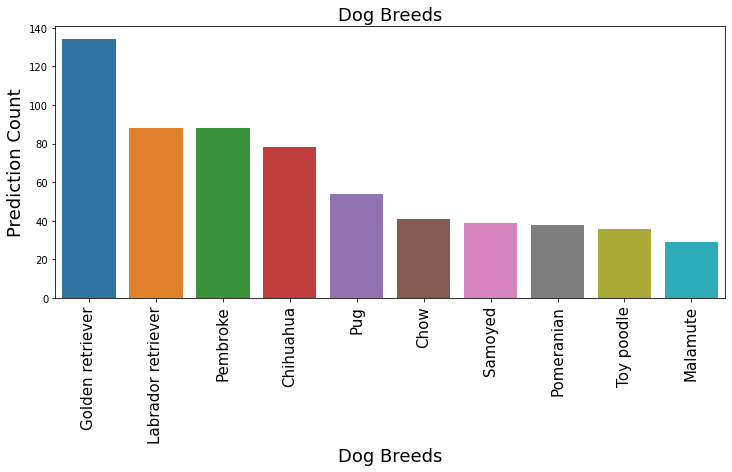

In [62]:
# The species of dogs that most frequently appear on WeRateDogs Twitter

plt.figure(figsize = (12,5))
ax = sns.barplot(x = master_df['p1'].value_counts()[0:10].index,
            y =master_df['p1'].value_counts()[0:10],
            data = master_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Dog Breeds",fontsize = 18);

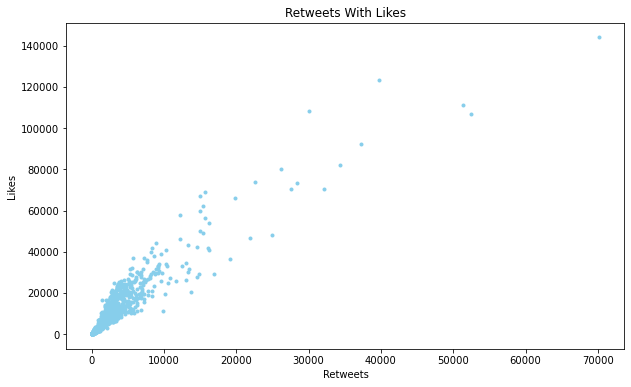

In [63]:
# Correlation between Retweets and Favourites(Likes)

plt.figure(figsize=(10, 6))
plt.scatter(master_df['retweet_count'],master_df['favorite_count'], color='skyblue', marker=".")
plt.xlabel("Retweets")
plt.ylabel("Likes")
plt.title("Retweets With Likes")
plt.show()

OBSERVATION - There is correlation between the Retweets and Favourite Counts(likes), meaning most posts with high dog retweets, generated more favourite counts(likes).

Refrences - 

1. https://medium.com/@chisompromise/twitter-data-analysis-weratedogs-1fb8b65da7fa
2. https://www.kaggle.com/code/msytnadeem/weratedogs-tweet-data-wrangling

